In [260]:
import numpy as np
import matplotlib.pyplot as plt

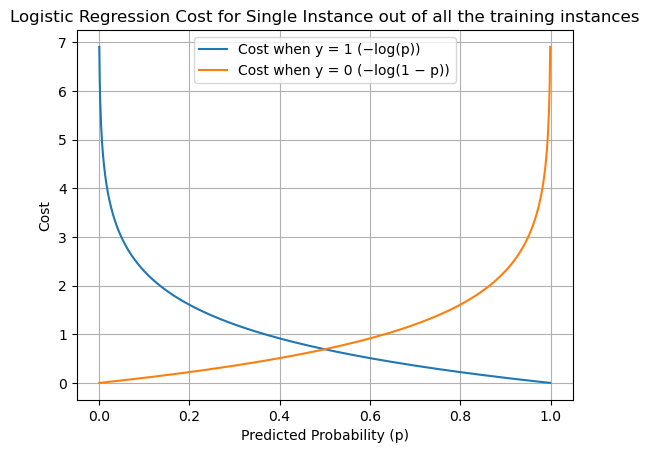

In [261]:
p = np.linspace(0.001, 0.999, 1000)
cost_y1 = -np.log(p)
cost_y0 = -np.log(1 - p)

plt.plot(p, cost_y1, label='Cost when y = 1 (−log(p))')
plt.plot(p, cost_y0, label='Cost when y = 0 (−log(1 − p))')
plt.title("Logistic Regression Cost for Single Instance out of all the training instances")
plt.xlabel("Predicted Probability (p)")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


In [262]:
np.arange(0,1,step = 100)

array([0])

C:\Users\jitik\AppData\Local\Temp\ipykernel_32272\2497159554.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(p,-(np.log(p)))


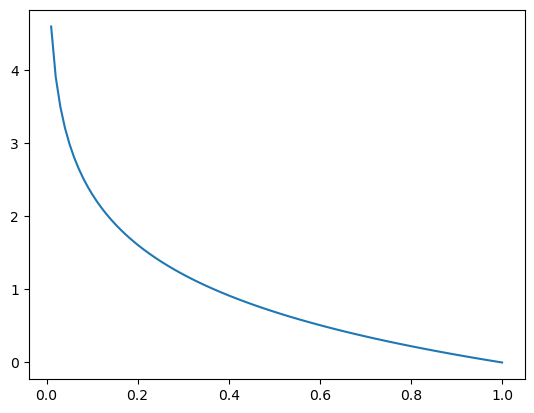

In [263]:
p = np.linspace(0,1,100)
plt.plot(p,-(np.log(p)))
plt.show()

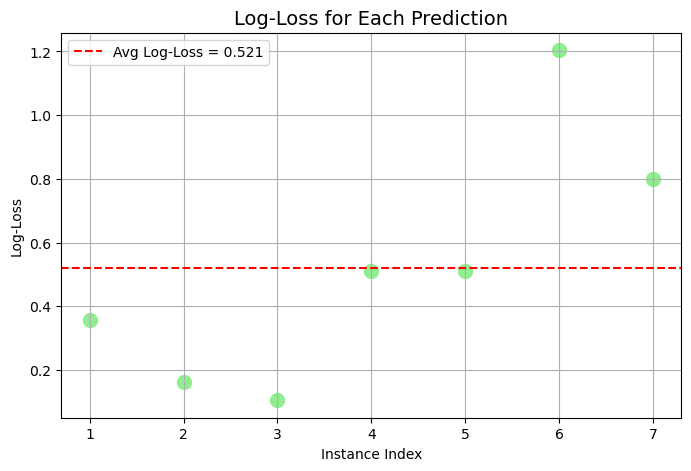

In [264]:
# Example of Logistic Regression (SAmple Data)
import pandas as pd

data = {
    'Age': [23, 30, 42, 36, 29, 52, 33],
    'Monthly_Income': [18000, 32000, 55000, 40000, 25000, 60000, 37000],
    'Visited_Before': [0, 1, 1, 0, 1, 0, 1],
    'True_Label': [0, 1, 1, 0, 1, 0, 1],
    'Predicted_Prob': [0.3, 0.85, 0.9, 0.4, 0.6, 0.7, 0.45]
}

df = pd.DataFrame(data,index = pd.RangeIndex(1,8))

# Plotting Log-Loss for each instance
indi_log_loss = -(df['True_Label']*np.log(df['Predicted_Prob']) + (1 - df['True_Label']) * np.log(1-df['Predicted_Prob']))
average_log_loss = indi_log_loss.mean()
plt.figure(figsize=(8,5))
plt.scatter(df.index, indi_log_loss, color='lightgreen', s=100)
plt.axhline(y = average_log_loss,color = 'red',linestyle = '--',label=f'Avg Log-Loss = {average_log_loss:.3f}')
plt.title("Log-Loss for Each Prediction", fontsize=14)
plt.xlabel("Instance Index")
plt.ylabel("Log-Loss")
plt.legend()
plt.grid(True)
plt.show()


In [265]:
a1 = np.array([[1,2,3],[4,5,6]])
b1 = np.array([[4,5,6],[7,8,9]])

a1.T@b1

array([[32, 37, 42],
       [43, 50, 57],
       [54, 63, 72]])

In [266]:
# Implementing Logistic Regression from scratch ( Sample Data)
import pandas as pd

data = {
    'WBC_Count':          [6.2, 12.5, 4.1, 15.8, 7.3, 13.2, 5.5, 11.0, 6.8, 14.7],
    'Platelet_Count':     [250, 180, 300, 140, 270, 160, 310, 175, 260, 150],
    'Fatigue_Level':      [0.2, 0.9, 0.1, 0.95, 0.3, 0.88, 0.15, 0.7, 0.4, 0.92],
    'Has_Family_History': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'Has_Disorder':       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df

,WBC_Count,Platelet_Count,Fatigue_Level,Has_Family_History,Has_Disorder
0,6.2,250,0.20,0,0
1,12.5,180,0.90,1,1
2,4.1,300,0.10,0,0
3,15.8,140,0.95,1,1
4,7.3,270,0.30,0,0
5,13.2,160,0.88,1,1
6,5.5,310,0.15,0,0
7,11.0,175,0.70,1,1
8,6.8,260,0.40,0,0
9,14.7,150,0.92,1,1


In [267]:
from sklearn.preprocessing import StandardScaler

feature_weights = np.array([0.1,0.1,0.1,0.1])
X = df.drop('Has_Disorder',axis = 1)
Y = df['Has_Disorder'].to_numpy()
scale = StandardScaler()
X = scale.fit_transform(X)
predictions = X@feature_weights.T # X.theta^T

def sigmoid(num):
    return 1/(1 + np.exp(-num))
sigmoid_pred = sigmoid(predictions) # Returns list of sigmoid Values
# predicted_proba = (sigmoid_pred >= 0.5).astype(int) # values greater than 0.5 as 1 , less than 0.5 as 0

indi_log_loss = - (1/X.shape[0]) * (Y * np.log(sigmoid_pred) + (1 - Y) * np.log(1 - sigmoid_pred))
log_loss = indi_log_loss.mean()

# Gradient Descent Step
epochs = 101
learning_rate = 0.1
losses = []
for i in range(1,epochs):
    predictions = X @ feature_weights.T
    sigmoid_pred = sigmoid(predictions)
    log_loss = -np.mean(Y * np.log(sigmoid_pred) + (1 - Y) * np.log(1 - sigmoid_pred))
    losses.append(log_loss)
    gradient = (1/X.shape[0]) * (X.T @ (sigmoid_pred - Y))
    feature_weights -= learning_rate * gradient     # Update weights
    if i % 10 == 0:
        print(f"Epoch {i} - Log-Loss: {log_loss:.4f}")

final_feature_weights = feature_weights
final_feature_weights

Epoch 10 - Log-Loss: 0.2557
Epoch 20 - Log-Loss: 0.1512
Epoch 30 - Log-Loss: 0.1072
Epoch 40 - Log-Loss: 0.0832
Epoch 50 - Log-Loss: 0.0680
Epoch 60 - Log-Loss: 0.0576
Epoch 70 - Log-Loss: 0.0500
Epoch 80 - Log-Loss: 0.0442
Epoch 90 - Log-Loss: 0.0397
Epoch 100 - Log-Loss: 0.0360


array([ 0.91524704, -0.76049353,  0.95528278,  1.0966541 ])

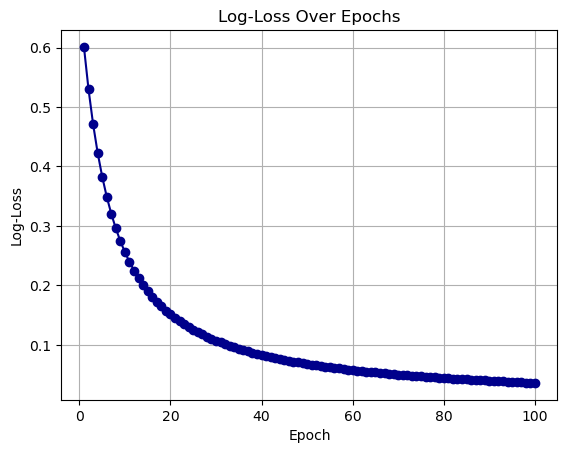

In [268]:
plt.plot(np.arange(1,epochs),losses,marker='o', linestyle='-', color='darkblue')
plt.title("Log-Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log-Loss")
plt.grid(True)
plt.show()

In [269]:
df = pd.read_csv('medical_disorder_dataset_clean.csv') # Downloaded from Kaggle 500 rows DAta
df

,WBC_Count,Platelet_Count,Fatigue_Level,Has_Family_History,Has_Disorder
0,7.2,195,0.62,0,0
1,8.5,378,0.13,0,0
2,11.7,146,0.24,0,0
3,4.0,232,0.18,0,0
4,10.2,194,0.16,0,0
...,...,...,...,...,...
495,10.0,192,0.36,0,0
496,2.7,293,0.02,0,0
497,7.9,171,0.17,0,0
498,7.7,220,0.26,1,0


In [270]:
def logistic_sample(epochs,learning_rate):
    from sklearn.preprocessing import StandardScaler

    feature_weights = np.array([0.1,0.1,0.1,0.1])
    X = df.drop('Has_Disorder',axis = 1)
    Y = df['Has_Disorder'].to_numpy()
    scale = StandardScaler()
    X = scale.fit_transform(X)
    predictions = X@feature_weights.T # X.theta^T

    def sigmoid(num):
        return 1/(1 + np.exp(-num))
    sigmoid_pred = sigmoid(predictions) # Returns list of sigmoid Values
    # predicted_proba = (sigmoid_pred >= 0.5).astype(int) # values greater than 0.5 as 1 , less than 0.5 as 0

    indi_log_loss = - (1/X.shape[0]) * (Y * np.log(sigmoid_pred) + (1 - Y) * np.log(1 - sigmoid_pred))
    log_loss = indi_log_loss.mean()

    # Gradient Descent Step
    # epochs = 200
    # learning_rate = 0.1
    losses = []
    for i in range(1,epochs):
        predictions = X @ feature_weights.T
        sigmoid_pred = sigmoid(predictions)
        log_loss = -np.mean(Y * np.log(sigmoid_pred) + (1 - Y) * np.log(1 - sigmoid_pred))
        losses.append(log_loss)
        gradient = (1/X.shape[0]) * (X.T @ (sigmoid_pred - Y))
        feature_weights -= learning_rate * gradient     # Update weights

    final_feature_weights = feature_weights
    return losses
    

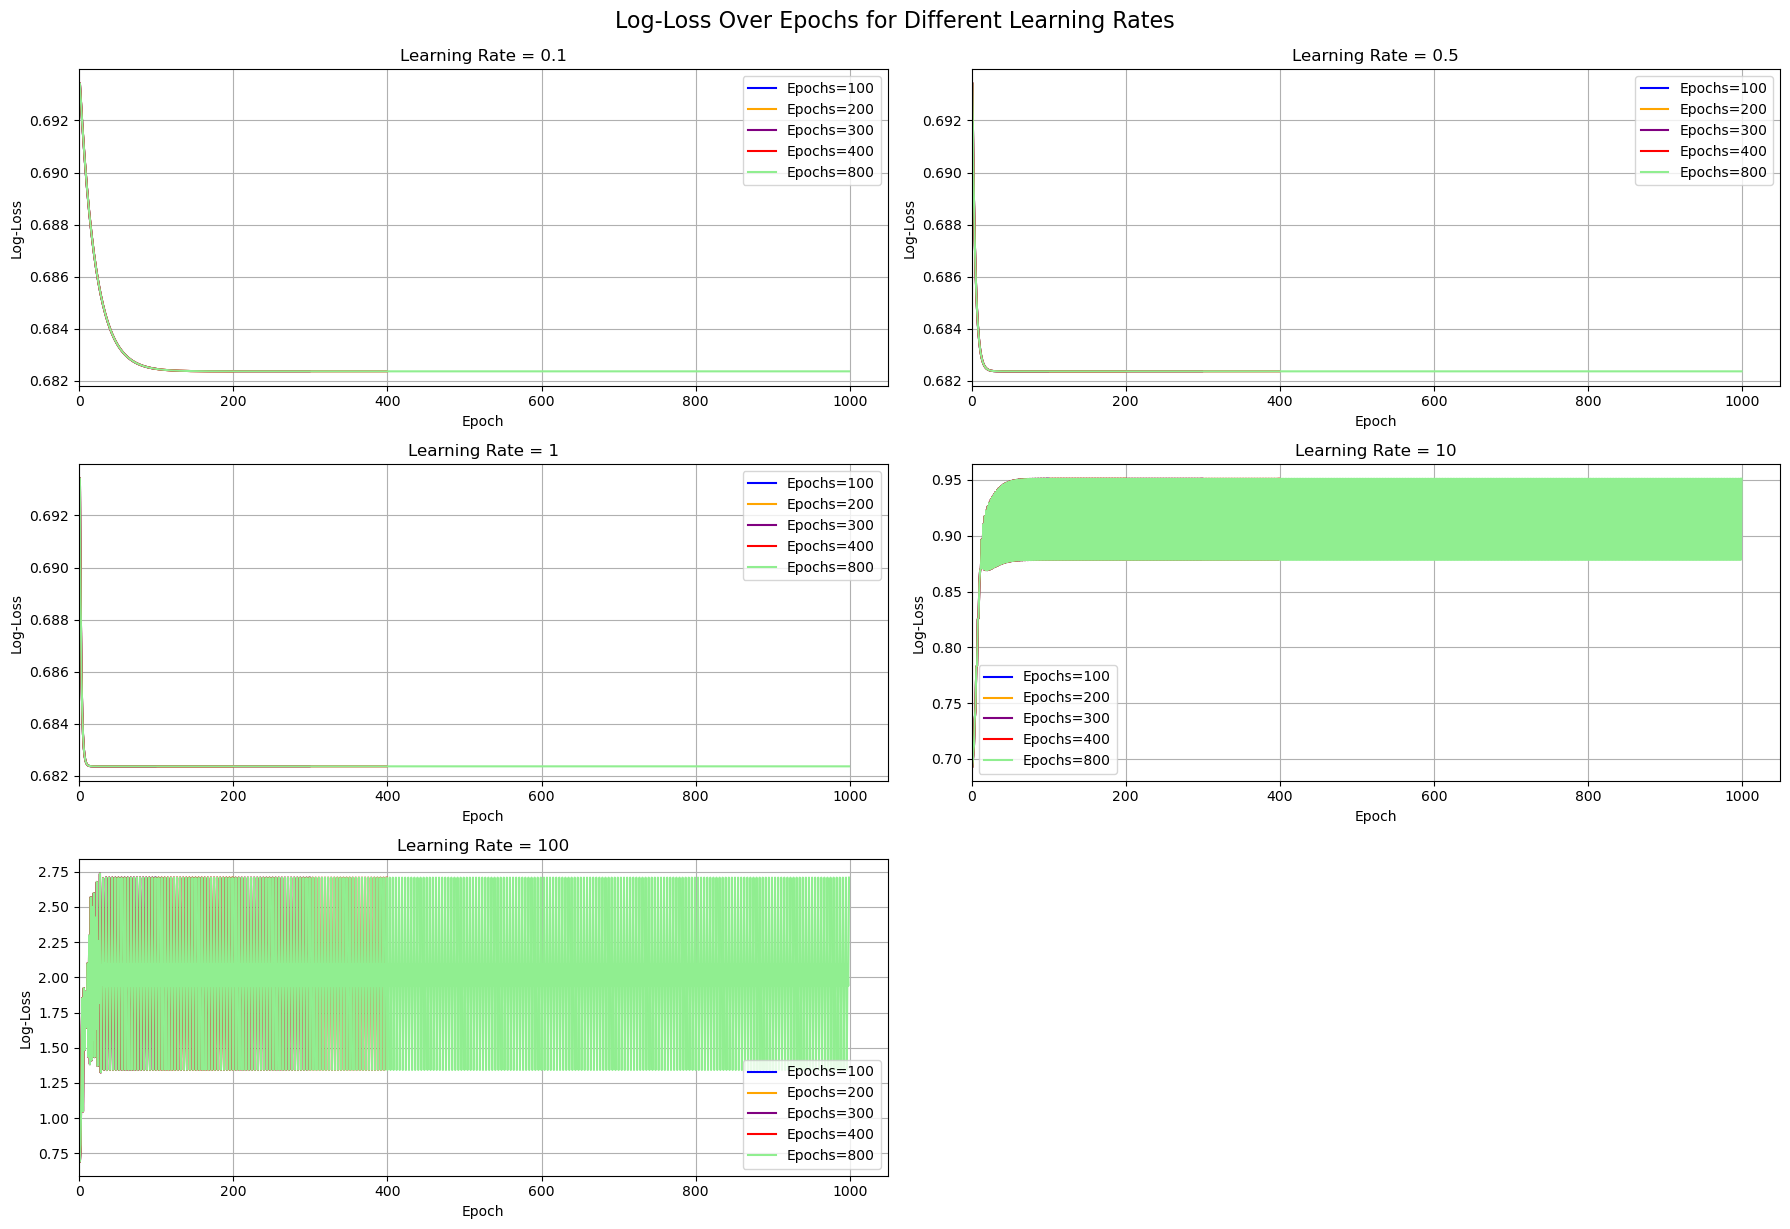

In [271]:
# Epoch and learning rate settings
epochs1 = 100
epochs2 = 200
epochs3 = 300
epochs4 = 400
epochs5 = 1000

learning_rate1 = 0.1
learning_rate2 = 0.5
learning_rate3 = 1
learning_rate4 = 10
learning_rate5 = 20

loss1_1 = logistic_sample(epochs1, learning_rate1)
loss2_1 = logistic_sample(epochs2, learning_rate1)
loss3_1 = logistic_sample(epochs3, learning_rate1)
loss4_1 = logistic_sample(epochs4, learning_rate1)
loss5_1 = logistic_sample(epochs5, learning_rate1)

loss1_2 = logistic_sample(epochs1, learning_rate2)
loss2_2 = logistic_sample(epochs2, learning_rate2)
loss3_2 = logistic_sample(epochs3, learning_rate2)
loss4_2 = logistic_sample(epochs4, learning_rate2)
loss5_2 = logistic_sample(epochs5, learning_rate2)

loss1_3 = logistic_sample(epochs1, learning_rate3)
loss2_3 = logistic_sample(epochs2, learning_rate3)
loss3_3 = logistic_sample(epochs3, learning_rate3)
loss4_3 = logistic_sample(epochs4, learning_rate3)
loss5_3 = logistic_sample(epochs5, learning_rate3)

loss1_4 = logistic_sample(epochs1, learning_rate4)
loss2_4 = logistic_sample(epochs2, learning_rate4)
loss3_4 = logistic_sample(epochs3, learning_rate4)
loss4_4 = logistic_sample(epochs4, learning_rate4)
loss5_4 = logistic_sample(epochs5, learning_rate4)

loss1_5 = logistic_sample(epochs1, learning_rate5)
loss2_5 = logistic_sample(epochs2, learning_rate5)
loss3_5 = logistic_sample(epochs3, learning_rate5)
loss4_5 = logistic_sample(epochs4, learning_rate5)
loss5_5 = logistic_sample(epochs5, learning_rate5)

# Plotting

# Titles and learning rate labels
learning_rates = [0.1, 0.5, 1, 10, 100]
all_losses = [
    [loss1_1, loss2_1, loss3_1, loss4_1, loss5_1],
    [loss1_2, loss2_2, loss3_2, loss4_2, loss5_2],
    [loss1_3, loss2_3, loss3_3, loss4_3, loss5_3],
    [loss1_4, loss2_4, loss3_4, loss4_4, loss5_4],
    [loss1_5, loss2_5, loss3_5, loss4_5, loss5_5],
]
epoch_sets = [100, 200, 300, 400, 800]
colors = ['blue', 'orange', 'purple', 'red', 'lightgreen']
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

for i in range(len(learning_rates)):
    ax = axes[i]
    for j, loss in enumerate(all_losses[i]):
        ax.plot(np.arange(1, len(loss) + 1), loss, label=f'Epochs={epoch_sets[j]}', color=colors[j])
    ax.set_title(f'Learning Rate = {learning_rates[i]}')
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Log-Loss")
    ax.grid(True)
    ax.legend()
    ax.set_xlim(left=0)

# Remove any extra subplot (last one if unused)
if len(learning_rates) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle("Log-Loss Over Epochs for Different Learning Rates", fontsize=16, y=1.02)
plt.show()

# plt.plot(np.arange(1, len(loss5) + 1), loss5, label='Epochs=1000', linestyle='-')


In [272]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
Y = iris.target_names[iris.target] == 'virginica'

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

In [274]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [275]:
log_reg.predict_proba(X_test)

array([[0.84890373, 0.15109627],
       [0.99436711, 0.00563289],
       [0.0767371 , 0.9232629 ],
       [0.6403484 , 0.3596516 ],
       [0.72310724, 0.27689276],
       [0.99175962, 0.00824038],
       [0.79297923, 0.20702077],
       [0.0767371 , 0.9232629 ],
       [0.6403484 , 0.3596516 ],
       [0.84890373, 0.15109627],
       [0.20777713, 0.79222287],
       [0.9973738 , 0.0026262 ],
       [0.99615272, 0.00384728],
       [0.9973738 , 0.0026262 ],
       [0.99436711, 0.00563289],
       [0.54830535, 0.45169465],
       [0.10866234, 0.89133766],
       [0.89178251, 0.10821749],
       [0.79297923, 0.20702077],
       [0.10866234, 0.89133766],
       [0.99615272, 0.00384728],
       [0.36071196, 0.63928804],
       [0.99175962, 0.00824038],
       [0.1516874 , 0.8483126 ],
       [0.20777713, 0.79222287],
       [0.0767371 , 0.9232629 ],
       [0.36071196, 0.63928804],
       [0.0767371 , 0.9232629 ],
       [0.99436711, 0.00563289],
       [0.99615272, 0.00384728],
       [0.

In [ ]:
from sklearn.model_selection import learning_curve, LearningCurveDisplay


In [284]:
X = iris.data.values
Y = iris.target

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class custom_softmax_classifier(BaseEstimator, ClassifierMixin):
    def __init__(self,epochs,learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
    